In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
ld_train= pd.read_csv(r"C:\Users\ujjawalv\Documents\train.csv")

In [3]:
ld_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [100]:
ld_test=pd.read_csv(r"C:\Users\ujjawalv\Documents\test.csv")

In [5]:
ld_test["SalePrice"]=np.NaN


In [6]:
ld_test["data"]="test"

In [7]:
ld_train["data"]="train"

In [8]:
ld=pd.concat([ld_train,ld_test],axis=0)

In [9]:
list(zip(ld.columns,ld.nunique(),ld.dtypes))

[('Id', 2919, dtype('int64')),
 ('MSSubClass', 16, dtype('int64')),
 ('MSZoning', 5, dtype('O')),
 ('LotFrontage', 128, dtype('float64')),
 ('LotArea', 1951, dtype('int64')),
 ('Street', 2, dtype('O')),
 ('Alley', 2, dtype('O')),
 ('LotShape', 4, dtype('O')),
 ('LandContour', 4, dtype('O')),
 ('Utilities', 2, dtype('O')),
 ('LotConfig', 5, dtype('O')),
 ('LandSlope', 3, dtype('O')),
 ('Neighborhood', 25, dtype('O')),
 ('Condition1', 9, dtype('O')),
 ('Condition2', 8, dtype('O')),
 ('BldgType', 5, dtype('O')),
 ('HouseStyle', 8, dtype('O')),
 ('OverallQual', 10, dtype('int64')),
 ('OverallCond', 9, dtype('int64')),
 ('YearBuilt', 118, dtype('int64')),
 ('YearRemodAdd', 61, dtype('int64')),
 ('RoofStyle', 6, dtype('O')),
 ('RoofMatl', 8, dtype('O')),
 ('Exterior1st', 15, dtype('O')),
 ('Exterior2nd', 16, dtype('O')),
 ('MasVnrType', 4, dtype('O')),
 ('MasVnrArea', 444, dtype('float64')),
 ('ExterQual', 4, dtype('O')),
 ('ExterCond', 5, dtype('O')),
 ('Foundation', 6, dtype('O')),
 ('Bsmt

In [12]:
## Let us capture all the nan values
## First lets handle Categorical features which are missing
features_nan=[feature for feature in ld.columns if ld[feature].isnull().sum()>1 and ld[feature].dtypes=='O']

for feature in features_nan:
    print("{}: {}% missing values".format(feature,np.round(ld[feature].isnull().mean(),4)))

MSZoning: 0.0014% missing values
Alley: 0.9322% missing values
Utilities: 0.0007% missing values
MasVnrType: 0.0082% missing values
BsmtQual: 0.0277% missing values
BsmtCond: 0.0281% missing values
BsmtExposure: 0.0281% missing values
BsmtFinType1: 0.0271% missing values
BsmtFinType2: 0.0274% missing values
Functional: 0.0007% missing values
FireplaceQu: 0.4865% missing values
GarageType: 0.0538% missing values
GarageFinish: 0.0545% missing values
GarageQual: 0.0545% missing values
GarageCond: 0.0545% missing values
PoolQC: 0.9966% missing values
Fence: 0.8044% missing values
MiscFeature: 0.964% missing values


In [13]:
# we can seee the data which high percentage of missing values we drop that
ld.drop(["Alley","PoolQC","Fence","MiscFeature"],axis=1,inplace=True)

In [14]:
ld.select_dtypes(["object"]).columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition', 'data'],
      dtype='object')

In [15]:
## Now lets check for numerical variables the contains missing values
numerical_with_nan=[feature for feature in ld.columns if ld[feature].isnull().sum()>1 and ld[feature].dtypes!='O']

## We will print the numerical nan variables and percentage of missing values

for feature in numerical_with_nan:
    print("{}: {}% missing value".format(feature,np.around(ld[feature].isnull().mean(),4)))

LotFrontage: 0.1665% missing value
MasVnrArea: 0.0079% missing value
BsmtFullBath: 0.0007% missing value
BsmtHalfBath: 0.0007% missing value
GarageYrBlt: 0.0545% missing value
SalePrice: 0.4998% missing value


In [16]:
## Temporal Variables (Date Time Variables)

for feature in ['YearBuilt','YearRemodAdd','GarageYrBlt']:
       
    ld[feature]=ld['YrSold']-ld[feature]

In [17]:
ld[['YearBuilt','YearRemodAdd','GarageYrBlt']].head()

,YearBuilt,YearRemodAdd,GarageYrBlt
0,5,5,5.0
1,31,31,31.0
2,7,6,7.0
3,91,36,8.0
4,8,8,8.0


In [18]:
ld["LotFrontage"].value_counts()

60.0     276
80.0     137
70.0     133
50.0     117
75.0     105
        ... 
137.0      1
182.0      1
119.0      1
195.0      1
141.0      1
Name: LotFrontage, Length: 128, dtype: int64

In [19]:
ld.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,data
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,2,2008,WD,Normal,208500.0,train
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,5,2007,WD,Normal,181500.0,train
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,9,2008,WD,Normal,223500.0,train
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,0,0,0,0,2,2006,WD,Abnorml,140000.0,train
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,12,2008,WD,Normal,250000.0,train


In [20]:
import numpy as np
num_features=['LotFrontage', 'LotArea', '1stFlrSF', 'GrLivArea', 'SalePrice']

for feature in num_features:
    ld[feature]=np.log(ld[feature])

In [21]:
cat_cols=ld.select_dtypes(["object"]).columns

In [22]:
cat_cols

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition', 'data'],
      dtype='object')

In [23]:
cat_cols=cat_cols[:-1]

In [24]:
for col in cat_cols:
    freqs=ld[col].value_counts()
    k=freqs.index[freqs>100]
    for cat in k:
        name=col+'_'+cat
        ld[name]=(ld[col]==cat).astype(int)
    del ld[col]
    print(col)

MSZoning
Street
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition1
Condition2
BldgType
HouseStyle
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
ExterQual
ExterCond
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
Heating
HeatingQC
CentralAir
Electrical
KitchenQual
Functional
FireplaceQu
GarageType
GarageFinish
GarageQual
GarageCond
PavedDrive
SaleType
SaleCondition


In [25]:
null_columns=ld.columns[ld.isnull().any()]
ld[null_columns].isnull().sum()


LotFrontage      486
MasVnrArea        23
BsmtFinSF1         1
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
BsmtFullBath       2
BsmtHalfBath       2
GarageYrBlt      159
GarageCars         1
GarageArea         1
SalePrice       1459
dtype: int64

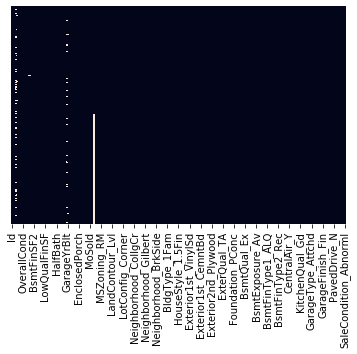

In [26]:
sns.heatmap(ld.isnull(),yticklabels=False,cbar=False)

In [27]:
ld["LotFrontage"]=ld["LotFrontage"].fillna(ld["LotFrontage"].mode()[0])

In [28]:
ld["GarageYrBlt"].value_counts()

 1.0      192
 0.0      150
 2.0       82
 4.0       81
 5.0       72
         ... 
 107.0      1
-200.0      1
-1.0        1
 108.0      1
 109.0      1
Name: GarageYrBlt, Length: 111, dtype: int64

In [29]:
ld["GarageYrBlt"]=ld["GarageYrBlt"].fillna(ld["GarageYrBlt"].mean())

In [30]:
ld["MasVnrArea"].value_counts()

0.0      1738
120.0      15
176.0      13
200.0      13
216.0      12
         ... 
664.0       1
247.0       1
550.0       1
137.0       1
572.0       1
Name: MasVnrArea, Length: 444, dtype: int64

In [31]:
ld["MasVnrArea"]=ld["MasVnrArea"].fillna(ld["MasVnrArea"].mean())

In [32]:
for col in ld.columns:
    if (col not in ["SalePrice",'data'])& (ld[col].isnull().sum()>0):
        ld.loc[ld[col].isnull(),col]=ld.loc[ld['data']=='train',col].mean()

In [33]:
feature_scale=[feature for feature in ld.columns if feature not in ['Id','SalePrice','data']]

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(ld[feature_scale])

MinMaxScaler(copy=True, feature_range=(0, 1))

In [34]:
scaler.transform(ld[feature_scale])# transform the train and test set, and add on the Id and SalePrice variables


array([[0.23529412, 0.41820812, 0.3663439 , ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.49506375, 0.39131677, ..., 1.        , 0.        ,
        0.        ],
       [0.23529412, 0.434909  , 0.4223585 , ..., 1.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.75162522, 0.53496717, ..., 0.        , 0.        ,
        1.        ],
       [0.38235294, 0.40071794, 0.40775256, ..., 1.        , 0.        ,
        0.        ],
       [0.23529412, 0.46620707, 0.39186645, ..., 1.        , 0.        ,
        0.        ]])

In [35]:
# transform the train and test set, and add on the Id and SalePrice variables
ld = pd.concat([ld[['Id', 'SalePrice','data']].reset_index(drop=True),
                    pd.DataFrame(scaler.transform(ld[feature_scale]), columns=feature_scale)],
                    axis=1)

In [36]:
ld.head()

,Id,SalePrice,data,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,...,GarageQual_TA,GarageQual_Fa,GarageCond_TA,PavedDrive_Y,PavedDrive_N,SaleType_WD,SaleType_New,SaleCondition_Normal,SaleCondition_Partial,SaleCondition_Abnorml
0,1,12.247694,train,0.235294,0.418208,0.366344,0.666667,0.500,0.043796,0.112903,...,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
1,2,12.109011,train,0.000000,0.495064,0.391317,0.555556,0.875,0.233577,0.532258,...,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
2,3,12.317167,train,0.235294,0.434909,0.422359,0.666667,0.500,0.058394,0.129032,...,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
3,4,11.849398,train,0.294118,0.388581,0.390295,0.666667,0.500,0.671533,0.612903,...,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
4,5,12.429216,train,0.235294,0.513123,0.468761,0.777778,0.500,0.065693,0.161290,...,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0


In [37]:
ld_train=ld[ld["data"]=="train"]

In [38]:
ld_test=ld[ld["data"]=="test"]

In [39]:
ld_test.drop(["SalePrice"],axis=1,inplace=True)

C:\Users\ujjawalv\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [40]:
ld_train.drop(['data'],axis=1,inplace=True)

In [41]:
ld_test.drop(['data'],axis=1,inplace=True)

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
train,test=train_test_split(ld_train,test_size=0.2,random_state=2)

In [44]:
x_train=train.drop(["SalePrice","Id"],axis=1)
y_train=train["SalePrice"]
x_test=test.drop(["SalePrice","Id"],axis=1)
y_test=test["SalePrice"]

In [45]:
from sklearn.linear_model import LinearRegression

In [46]:
lm= LinearRegression()

In [47]:
lm.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [48]:
logr=lm.predict(x_test)

In [49]:
from sklearn.metrics import  mean_squared_error

In [50]:
 mean_squared_error(logr,y_test)

0.016705180865860682

In [51]:
## for feature slection

from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

# to visualise al the columns in the dataframe
pd.pandas.set_option('display.max_columns', None)

In [52]:
x_train.shape

(1168, 148)

In [53]:
# first, I specify the Lasso Regression model, and I
# select a suitable alpha (equivalent of penalty).
# The bigger the alpha the less features that will be selected.

# Then I use the selectFromModel object from sklearn, which
# will select the features which coefficients are non-zero

feature_sel_model = SelectFromModel(Lasso(alpha=0.005, random_state=0)) # remember to set the seed, the random state in this function
feature_sel_model.fit(x_train, y_train)

SelectFromModel(estimator=Lasso(alpha=0.005, copy_X=True, fit_intercept=True,
                                max_iter=1000, normalize=False, positive=False,
                                precompute=False, random_state=0,
                                selection='cyclic', tol=0.0001,
                                warm_start=False),
                max_features=None, norm_order=1, prefit=False, threshold=None)

In [54]:
feature_sel_model.get_support()

array([False, False, False,  True, False, False,  True, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False,  True, False,  True,  True,
       False, False, False, False, False, False, False, False, False,
        True,  True, False, False,  True, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False,  True, False, False,  True, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False,  True, False, False, False, False,  True, False,
       False,  True, False,  True, False, False, False,  True, False,
        True, False,  True,  True, False, False, False, False, False,
       False, False,  True, False, False,  True, False, False, False,
        True, False,

In [58]:
# let's print the number of total and selected features

# this is how we can make a list of the selected features
selected_feat = x_train.columns[(feature_sel_model.get_support())]

# let's print some stats
print('total features: {}'.format((x_train.shape[1])))
print('selected features: {}'.format(len(selected_feat)))
print('features with coefficients shrank to zero: {}'.format(
    np.sum(sel_.estimator_.coef_ == 0)))

total features: 148
selected features: 37


NameError: name 'sel_' is not defined

In [59]:
selected_feat

Index(['OverallQual', 'YearRemodAdd', 'GrLivArea', 'Fireplaces', 'GarageCars',
       'GarageArea', 'MSZoning_RL', 'MSZoning_RM', 'LotShape_Reg',
       'LotConfig_Inside', 'Neighborhood_Edwards', 'Condition1_Norm',
       'BldgType_1Fam', 'RoofStyle_Gable', 'MasVnrType_None', 'ExterQual_TA',
       'Foundation_PConc', 'BsmtQual_TA', 'BsmtQual_Ex', 'BsmtExposure_No',
       'BsmtExposure_Gd', 'BsmtFinType1_Unf', 'BsmtFinType1_GLQ',
       'HeatingQC_Ex', 'CentralAir_Y', 'KitchenQual_TA', 'KitchenQual_Ex',
       'Functional_Typ', 'FireplaceQu_Gd', 'FireplaceQu_TA',
       'GarageType_Attchd', 'GarageFinish_Unf', 'GarageFinish_Fin',
       'GarageCond_TA', 'PavedDrive_Y', 'PavedDrive_N',
       'SaleCondition_Abnorml'],
      dtype='object')

In [60]:
x_train=x_train[selected_feat]

In [64]:
x_test=x_test[selected_feat]

In [61]:
x_train.head()

,OverallQual,YearRemodAdd,GrLivArea,Fireplaces,GarageCars,GarageArea,MSZoning_RL,MSZoning_RM,LotShape_Reg,LotConfig_Inside,Neighborhood_Edwards,Condition1_Norm,BldgType_1Fam,RoofStyle_Gable,MasVnrType_None,ExterQual_TA,Foundation_PConc,BsmtQual_TA,BsmtQual_Ex,BsmtExposure_No,BsmtExposure_Gd,BsmtFinType1_Unf,BsmtFinType1_GLQ,HeatingQC_Ex,CentralAir_Y,KitchenQual_TA,KitchenQual_Ex,Functional_Typ,FireplaceQu_Gd,FireplaceQu_TA,GarageType_Attchd,GarageFinish_Unf,GarageFinish_Fin,GarageCond_TA,PavedDrive_Y,PavedDrive_N,SaleCondition_Abnorml
455,0.666667,0.580645,0.464593,0.25,0.4,0.354839,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0
863,0.444444,0.838710,0.436753,0.00,0.2,0.451613,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0
504,0.555556,0.596774,0.486675,0.25,0.4,0.295699,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0
1413,0.777778,0.080645,0.604401,0.25,0.4,0.416667,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0
1389,0.555556,0.951613,0.457691,0.25,0.4,0.295699,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0


In [62]:
lm.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [65]:
logr=lm.predict(x_test)

In [66]:
from sklearn.metrics import  mean_squared_error

In [67]:
mean_squared_error(logr,y_test)

0.019057440703722277

In [76]:
import xgboost
regressor=xgboost.XGBRegressor()

In [77]:
booster=['gbtree','gblinear']
base_score=[0.25,0.5,0.75,1]

In [78]:
## Hyper Parameter Optimization


n_estimators = [100, 500, 900, 1100, 1500]
max_depth = [2, 3, 5, 10, 15]
booster=['gbtree','gblinear']
learning_rate=[0.05,0.1,0.15,0.20]
min_child_weight=[1,2,3,4]

# Define the grid of hyperparameters to search
hyperparameter_grid = {
    'n_estimators': n_estimators,
    'max_depth':max_depth,
    'learning_rate':learning_rate,
    'min_child_weight':min_child_weight,
    'booster':booster,
    'base_score':base_score
    }

In [79]:
from sklearn.model_selection import  RandomizedSearchCV

In [80]:
# Set up the random search with 4-fold cross validation
random_cv = RandomizedSearchCV(estimator=regressor,
            param_distributions=hyperparameter_grid,
            cv=5, n_iter=50,
            scoring = 'neg_mean_absolute_error',n_jobs = 4,
            verbose = 5, 
            return_train_score = True,
            random_state=42)

In [81]:
random_cv.fit(x_train,y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:   18.0s
[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed:   53.1s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:  1.4min
[Parallel(n_jobs=4)]: Done 250 out of 250 | elapsed:  2.1min finished


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_con...
                   iid='warn', n_iter=50, n_jobs=4,
                   param_distributions={'base_score': [0.25, 0.5, 0.75, 1],
                                        'booster': ['gbtree', 'gblinear'],
                              

In [82]:
random_cv.best_estimator_

XGBRegressor(base_score=0.25, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.05, max_delta_step=0, max_depth=2,
             min_child_weight=4, missing=nan, monotone_constraints=None,
             n_estimators=900, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
             validate_parameters=False, verbosity=None)

In [83]:
random_cv.best_estimator_

XGBRegressor(base_score=0.25, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.05, max_delta_step=0, max_depth=2,
             min_child_weight=4, missing=nan, monotone_constraints=None,
             n_estimators=900, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
             validate_parameters=False, verbosity=None)

In [84]:
regressor=xgboost.XGBRegressor(base_score=0.25, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=2, min_child_weight=1, missing=None, n_estimators=900,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [86]:
regressor.fit(x_train,y_train)

XGBRegressor(base_score=0.25, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.1, max_delta_step=0, max_depth=2,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             n_estimators=900, n_jobs=1, nthread=1, num_parallel_tree=1,
             objective='reg:linear', random_state=0, reg_alpha=0, reg_lambda=1,
             scale_pos_weight=1, seed=0, silent=True, subsample=1,
             tree_method=None, validate_parameters=False, verbosity=None)

In [87]:
logr=regressor.predict(x_test)

In [88]:
from sklearn.metrics import  mean_squared_error

In [89]:
mean_squared_error(logr,y_test)

0.020943752334569316

In [93]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout


# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(output_dim = 50, init = 'he_uniform',activation='relu',input_dim =x_train.shape[1] ))

# Adding the second hidden layer
classifier.add(Dense(output_dim = 25, init = 'he_uniform',activation='relu'))

# Adding the third hidden layer
classifier.add(Dense(output_dim = 50, init = 'he_uniform',activation='relu'))
# Adding the output layer
classifier.add(Dense(output_dim = 1, init = 'he_uniform',activation='linear'))

# Compiling the ANN
classifier.compile(loss='mean_absolute_error', optimizer='Adamax')

# Fitting the ANN to the Training set
model_history=classifier.fit(x_train.values, y_train.values,validation_split=0.20, batch_size = 10, nb_epoch = 1000)

C:\Users\ujjawalv\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=37, units=50, kernel_initializer="he_uniform")`
  if sys.path[0] == '':
C:\Users\ujjawalv\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=25, kernel_initializer="he_uniform")`
  from ipykernel import kernelapp as app
C:\Users\ujjawalv\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:18: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=50, kernel_initializer="he_uniform")`
C:\Users\ujjawalv\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:20: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="linear", units=1, kernel_initializer="he_uniform")`
C:\Users\ujjawalv\AppDat

Train on 934 samples, validate on 234 samples
Epoch 1/1000
934/934 [==============================] - 32s 34ms/step - loss: 3.6525 - val_loss: 0.9217
Epoch 2/1000
934/934 [==============================] - 30s 32ms/step - loss: 0.8246 - val_loss: 0.7151
Epoch 3/1000
934/934 [==============================] - 31s 33ms/step - loss: 0.6172 - val_loss: 0.6419
Epoch 4/1000
934/934 [==============================] - 30s 32ms/step - loss: 0.5590 - val_loss: 0.6478
Epoch 5/1000
934/934 [==============================] - 30s 33ms/step - loss: 0.4772 - val_loss: 0.5037
Epoch 6/1000
934/934 [==============================] - 32s 34ms/step - loss: 0.4307 - val_loss: 0.4902
Epoch 7/1000
934/934 [==============================] - 31s 33ms/step - loss: 0.3980 - val_loss: 0.4201
Epoch 8/1000
934/934 [==============================] - 30s 33ms/step - loss: 0.3678 - val_loss: 0.4167
Epoch 9/1000
934/934 [==============================] - 30s 33ms/step - loss: 0.3335 - val_loss: 0.3765
Epoch 10/1000
934/

934/934 [==============================] - 33s 36ms/step - loss: 0.1047 - val_loss: 0.2149
Epoch 79/1000
934/934 [==============================] - 34s 36ms/step - loss: 0.1064 - val_loss: 0.1980
Epoch 80/1000
934/934 [==============================] - 33s 35ms/step - loss: 0.1060 - val_loss: 0.2031
Epoch 81/1000
934/934 [==============================] - 33s 36ms/step - loss: 0.1215 - val_loss: 0.2075
Epoch 82/1000
934/934 [==============================] - 31s 33ms/step - loss: 0.1212 - val_loss: 0.1943
Epoch 83/1000
934/934 [==============================] - 31s 34ms/step - loss: 0.1010 - val_loss: 0.1967
Epoch 84/1000
934/934 [==============================] - 36s 38ms/step - loss: 0.1035 - val_loss: 0.2078
Epoch 85/1000
934/934 [==============================] - 33s 36ms/step - loss: 0.1023 - val_loss: 0.1925
Epoch 86/1000
934/934 [==============================] - 31s 33ms/step - loss: 0.1182 - val_loss: 0.2399
Epoch 87/1000
934/934 [==============================] - 31s 34ms/ste

934/934 [==============================] - 31s 33ms/step - loss: 0.0862 - val_loss: 0.1776
Epoch 156/1000
934/934 [==============================] - 31s 33ms/step - loss: 0.0749 - val_loss: 0.1978
Epoch 157/1000
934/934 [==============================] - 31s 33ms/step - loss: 0.0936 - val_loss: 0.1799
Epoch 158/1000
934/934 [==============================] - 31s 33ms/step - loss: 0.0884 - val_loss: 0.1749
Epoch 159/1000
934/934 [==============================] - 31s 33ms/step - loss: 0.0780 - val_loss: 0.1803
Epoch 160/1000
934/934 [==============================] - 31s 33ms/step - loss: 0.0883 - val_loss: 0.1884
Epoch 161/1000
934/934 [==============================] - 31s 34ms/step - loss: 0.0807 - val_loss: 0.1732
Epoch 162/1000
934/934 [==============================] - 31s 33ms/step - loss: 0.0830 - val_loss: 0.1766
Epoch 163/1000
934/934 [==============================] - 31s 33ms/step - loss: 0.0718 - val_loss: 0.1837
Epoch 164/1000
934/934 [==============================] - 31s

934/934 [==============================] - 30s 32ms/step - loss: 0.0797 - val_loss: 0.1779
Epoch 233/1000
934/934 [==============================] - 30s 32ms/step - loss: 0.0640 - val_loss: 0.1754
Epoch 234/1000
934/934 [==============================] - 30s 32ms/step - loss: 0.0634 - val_loss: 0.1701
Epoch 235/1000
934/934 [==============================] - 30s 33ms/step - loss: 0.0634 - val_loss: 0.1661
Epoch 236/1000
934/934 [==============================] - 30s 32ms/step - loss: 0.0750 - val_loss: 0.1649
Epoch 237/1000
934/934 [==============================] - 31s 33ms/step - loss: 0.0721 - val_loss: 0.1680
Epoch 238/1000
934/934 [==============================] - 35s 37ms/step - loss: 0.0666 - val_loss: 0.1706
Epoch 239/1000
934/934 [==============================] - 33s 35ms/step - loss: 0.0717 - val_loss: 0.1772
Epoch 240/1000
934/934 [==============================] - 33s 35ms/step - loss: 0.0721 - val_loss: 0.1683
Epoch 241/1000
934/934 [==============================] - 33s

934/934 [==============================] - 30s 32ms/step - loss: 0.0648 - val_loss: 0.1894
Epoch 310/1000
934/934 [==============================] - 30s 32ms/step - loss: 0.0591 - val_loss: 0.1642
Epoch 311/1000
934/934 [==============================] - 29s 31ms/step - loss: 0.0612 - val_loss: 0.1657
Epoch 312/1000
934/934 [==============================] - 30s 32ms/step - loss: 0.0582 - val_loss: 0.1732
Epoch 313/1000
934/934 [==============================] - 30s 32ms/step - loss: 0.0762 - val_loss: 0.1791
Epoch 314/1000
934/934 [==============================] - 30s 32ms/step - loss: 0.0595 - val_loss: 0.1635
Epoch 315/1000
934/934 [==============================] - 30s 32ms/step - loss: 0.0714 - val_loss: 0.1612
Epoch 316/1000
934/934 [==============================] - 30s 32ms/step - loss: 0.0758 - val_loss: 0.1704
Epoch 317/1000
934/934 [==============================] - 30s 32ms/step - loss: 0.0655 - val_loss: 0.1689
Epoch 318/1000
934/934 [==============================] - 30s

934/934 [==============================] - 30s 32ms/step - loss: 0.0751 - val_loss: 0.1724
Epoch 387/1000
934/934 [==============================] - 30s 32ms/step - loss: 0.0551 - val_loss: 0.1618
Epoch 388/1000
934/934 [==============================] - 30s 32ms/step - loss: 0.0668 - val_loss: 0.1614
Epoch 389/1000
934/934 [==============================] - 29s 31ms/step - loss: 0.0639 - val_loss: 0.1639
Epoch 390/1000
934/934 [==============================] - 30s 32ms/step - loss: 0.0679 - val_loss: 0.1618
Epoch 391/1000
934/934 [==============================] - 30s 32ms/step - loss: 0.0538 - val_loss: 0.1640
Epoch 392/1000
934/934 [==============================] - 30s 32ms/step - loss: 0.0649 - val_loss: 0.1627
Epoch 393/1000
934/934 [==============================] - 30s 32ms/step - loss: 0.0552 - val_loss: 0.1602
Epoch 394/1000
934/934 [==============================] - 29s 31ms/step - loss: 0.0540 - val_loss: 0.1605
Epoch 395/1000
934/934 [==============================] - 29s

934/934 [==============================] - 47s 50ms/step - loss: 0.0592 - val_loss: 0.1636
Epoch 464/1000
934/934 [==============================] - 46s 49ms/step - loss: 0.0607 - val_loss: 0.1565
Epoch 465/1000
934/934 [==============================] - 47s 51ms/step - loss: 0.0582 - val_loss: 0.1598
Epoch 466/1000
934/934 [==============================] - 47s 51ms/step - loss: 0.0528 - val_loss: 0.1669
Epoch 467/1000
934/934 [==============================] - 47s 51ms/step - loss: 0.0575 - val_loss: 0.1895
Epoch 468/1000
934/934 [==============================] - 47s 51ms/step - loss: 0.0666 - val_loss: 0.1741
Epoch 469/1000
934/934 [==============================] - 47s 51ms/step - loss: 0.0622 - val_loss: 0.1637
Epoch 470/1000
934/934 [==============================] - 37s 40ms/step - loss: 0.0518 - val_loss: 0.1555
Epoch 471/1000
934/934 [==============================] - 30s 32ms/step - loss: 0.0651 - val_loss: 0.1566
Epoch 472/1000
934/934 [==============================] - 29s

934/934 [==============================] - 30s 32ms/step - loss: 0.0488 - val_loss: 0.1751
Epoch 541/1000
934/934 [==============================] - 29s 31ms/step - loss: 0.0577 - val_loss: 0.1763
Epoch 542/1000
934/934 [==============================] - 30s 32ms/step - loss: 0.0496 - val_loss: 0.1604
Epoch 543/1000
934/934 [==============================] - 30s 32ms/step - loss: 0.0507 - val_loss: 0.1602
Epoch 544/1000
934/934 [==============================] - 30s 32ms/step - loss: 0.0531 - val_loss: 0.1651
Epoch 545/1000
934/934 [==============================] - 30s 32ms/step - loss: 0.0512 - val_loss: 0.1750
Epoch 546/1000
934/934 [==============================] - 30s 32ms/step - loss: 0.0583 - val_loss: 0.1572
Epoch 547/1000
934/934 [==============================] - 30s 32ms/step - loss: 0.0560 - val_loss: 0.1569
Epoch 548/1000
934/934 [==============================] - 29s 31ms/step - loss: 0.0552 - val_loss: 0.1552
Epoch 549/1000
934/934 [==============================] - 30s

934/934 [==============================] - 30s 33ms/step - loss: 0.0597 - val_loss: 0.1617
Epoch 618/1000
934/934 [==============================] - 31s 33ms/step - loss: 0.0453 - val_loss: 0.1612
Epoch 619/1000
934/934 [==============================] - 32s 34ms/step - loss: 0.0459 - val_loss: 0.1652
Epoch 620/1000
934/934 [==============================] - 33s 35ms/step - loss: 0.0466 - val_loss: 0.1598
Epoch 621/1000
934/934 [==============================] - 30s 33ms/step - loss: 0.0509 - val_loss: 0.1567
Epoch 622/1000
934/934 [==============================] - 30s 33ms/step - loss: 0.0524 - val_loss: 0.1565
Epoch 623/1000
934/934 [==============================] - 30s 32ms/step - loss: 0.0631 - val_loss: 0.1664
Epoch 624/1000
934/934 [==============================] - 30s 33ms/step - loss: 0.0442 - val_loss: 0.1544
Epoch 625/1000
934/934 [==============================] - 31s 33ms/step - loss: 0.0490 - val_loss: 0.1609
Epoch 626/1000
934/934 [==============================] - 31s

934/934 [==============================] - 30s 32ms/step - loss: 0.0486 - val_loss: 0.1575
Epoch 695/1000
934/934 [==============================] - 30s 32ms/step - loss: 0.0519 - val_loss: 0.1604
Epoch 696/1000
934/934 [==============================] - 30s 33ms/step - loss: 0.0463 - val_loss: 0.1535
Epoch 697/1000
934/934 [==============================] - 31s 33ms/step - loss: 0.0441 - val_loss: 0.1554
Epoch 698/1000
934/934 [==============================] - 31s 33ms/step - loss: 0.0500 - val_loss: 0.1615
Epoch 699/1000
934/934 [==============================] - 30s 33ms/step - loss: 0.0483 - val_loss: 0.1556
Epoch 700/1000
934/934 [==============================] - 30s 32ms/step - loss: 0.0477 - val_loss: 0.1561
Epoch 701/1000
934/934 [==============================] - 30s 32ms/step - loss: 0.0460 - val_loss: 0.1580
Epoch 702/1000
934/934 [==============================] - 30s 32ms/step - loss: 0.0566 - val_loss: 0.1626
Epoch 703/1000
934/934 [==============================] - 30s

934/934 [==============================] - 31s 34ms/step - loss: 0.0405 - val_loss: 0.1635
Epoch 772/1000
934/934 [==============================] - 31s 33ms/step - loss: 0.0483 - val_loss: 0.1616
Epoch 773/1000
934/934 [==============================] - 31s 33ms/step - loss: 0.0382 - val_loss: 0.1630
Epoch 774/1000
934/934 [==============================] - 31s 33ms/step - loss: 0.0470 - val_loss: 0.1611
Epoch 775/1000
934/934 [==============================] - 31s 33ms/step - loss: 0.0453 - val_loss: 0.1547
Epoch 776/1000
934/934 [==============================] - 31s 33ms/step - loss: 0.0464 - val_loss: 0.1648
Epoch 777/1000
934/934 [==============================] - 31s 33ms/step - loss: 0.0438 - val_loss: 0.1696
Epoch 778/1000
934/934 [==============================] - 31s 33ms/step - loss: 0.0523 - val_loss: 0.1619
Epoch 779/1000
934/934 [==============================] - 31s 33ms/step - loss: 0.0505 - val_loss: 0.1608
Epoch 780/1000
934/934 [==============================] - 31s

934/934 [==============================] - 30s 32ms/step - loss: 0.0448 - val_loss: 0.1571
Epoch 849/1000
934/934 [==============================] - 30s 32ms/step - loss: 0.0518 - val_loss: 0.1619
Epoch 850/1000
934/934 [==============================] - 30s 32ms/step - loss: 0.0419 - val_loss: 0.1658
Epoch 851/1000
934/934 [==============================] - 29s 31ms/step - loss: 0.0419 - val_loss: 0.1579
Epoch 852/1000
934/934 [==============================] - 30s 32ms/step - loss: 0.0410 - val_loss: 0.1668
Epoch 853/1000
934/934 [==============================] - 30s 32ms/step - loss: 0.0572 - val_loss: 0.1600
Epoch 854/1000
934/934 [==============================] - 30s 32ms/step - loss: 0.0373 - val_loss: 0.1609
Epoch 855/1000
934/934 [==============================] - 30s 32ms/step - loss: 0.0395 - val_loss: 0.1633
Epoch 856/1000
934/934 [==============================] - 30s 32ms/step - loss: 0.0577 - val_loss: 0.1925
Epoch 857/1000
934/934 [==============================] - 30s

934/934 [==============================] - 31s 33ms/step - loss: 0.0483 - val_loss: 0.1627
Epoch 926/1000
934/934 [==============================] - 30s 33ms/step - loss: 0.0525 - val_loss: 0.1791
Epoch 927/1000
934/934 [==============================] - 31s 33ms/step - loss: 0.0459 - val_loss: 0.1639
Epoch 928/1000
934/934 [==============================] - 37s 39ms/step - loss: 0.0410 - val_loss: 0.1676
Epoch 929/1000
934/934 [==============================] - 34s 37ms/step - loss: 0.0416 - val_loss: 0.1670
Epoch 930/1000
934/934 [==============================] - 41s 44ms/step - loss: 0.0421 - val_loss: 0.1624
Epoch 931/1000
934/934 [==============================] - 34s 36ms/step - loss: 0.0441 - val_loss: 0.1590
Epoch 932/1000
934/934 [==============================] - 34s 36ms/step - loss: 0.0438 - val_loss: 0.1616
Epoch 933/1000
934/934 [==============================] - 31s 33ms/step - loss: 0.0483 - val_loss: 0.1603
Epoch 934/1000
934/934 [==============================] - 31s

In [94]:
predict_ir=classifier.predict(x_test)

In [95]:
mean_squared_error(predict_ir,y_test)

0.04219718648278235

In [ ]:
predict_ir=classifier.predict(x_test)

In [96]:
ld_test=ld_test[selected_feat]

In [97]:
predict_ir_final=classifier.predict(ld_test)

In [98]:
predict_ir_final

array([[11.470753],
       [11.951985],
       [12.063473],
       ...,
       [11.839749],
       [11.782703],
       [12.356799]], dtype=float32)

In [102]:
ld_test["SalePrice"]=predict_ir_final

In [103]:
final_prediction=ld_test[['Id',"SalePrice"]]

In [104]:
final_prediction

,Id,SalePrice
0,1461,11.470753
1,1462,11.951985
2,1463,12.063473
3,1464,12.332918
4,1465,12.345942
...,...,...
1454,2915,11.485794
1455,2916,11.235067
1456,2917,11.839749
1457,2918,11.782703


In [105]:
ld_train[['Id',"SalePrice"]]

,Id,SalePrice
0,1,12.247694
1,2,12.109011
2,3,12.317167
3,4,11.849398
4,5,12.429216
...,...,...
1455,1456,12.072541
1456,1457,12.254863
1457,1458,12.493130
1458,1459,11.864462


In [106]:
pd.DataFrame(final_prediction).to_csv("advance_house_price_prediction.csv",index=False)